<a href="https://colab.research.google.com/github/SafiyyahKazim/Google-COLAB/blob/master/mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import unittest
%matplotlib inline

In [7]:
!wget https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv

--2021-01-20 02:22:28--  https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘us-counties.csv.1’

us-counties.csv.1       [ <=>                ]  88.70K  --.-KB/s    in 0.08s   

2021-01-20 02:22:29 (1.11 MB/s) - ‘us-counties.csv.1’ saved [90830]



In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943233 entries, 0 to 943232
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    943233 non-null  object 
 1   county  943233 non-null  object 
 2   state   943233 non-null  object 
 3   fips    934434 non-null  float64
 4   cases   943233 non-null  int64  
 5   deaths  923068 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 43.2+ MB


In [14]:
df['county'].describe()

count         943233
unique          1930
top       Washington
freq            9335
Name: county, dtype: object

In [23]:
df.describe()

,fips,cases,deaths
count,934434.000000,9.432330e+05,923068.000000
mean,31273.607788,2.256154e+03,57.562226
std,16301.113750,1.185291e+04,462.654322
min,1001.000000,0.000000e+00,0.000000
25%,19001.000000,4.100000e+01,0.000000
50%,29217.000000,2.690000e+02,5.000000
75%,46101.000000,1.161000e+03,25.000000
max,78030.000000,1.024592e+06,26104.000000


Text(0.5, 0, 'cases')

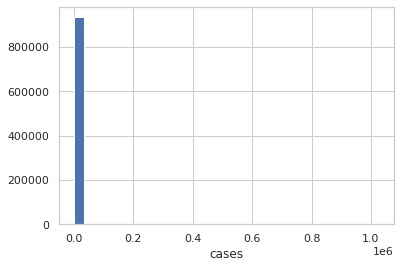

In [31]:
sns.set_style('whitegrid')
df['cases'].hist(bins=30)
plt.xlabel('cases')

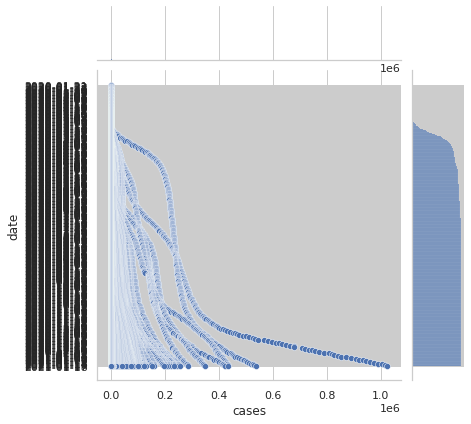

In [32]:
sns.jointplot(x='cases',y='date',data=df)

In [19]:
df.head(10)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
5,2020-01-25,Orange,California,6059.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0


In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X = df[['deaths', 'cases', 'fips']]
y = df['date']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

ValueError: ignored